#### we're going to look at recipes. Specifically we'll use the epicurious dataset, which has a collection of recipes, key terms and ingredients, and their ratings.

#### What we want to see is if we can use the ingredient and keyword list to predict the rating. For someone writing a cookbook this could be really useful information that could help them choose which recipes to include because they're more likely to be enjoyed and therefore make the book more likely to be successful.

In [67]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
df = pd.read_csv("epi_r.csv")

In [69]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
df.tail()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20051,Baked Ham with Marmalade-Horseradish Glaze,4.375,560.0,73.0,10.0,3698.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
df.shape

(20052, 680)

In [72]:
df.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
list(df.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [74]:
df.dtypes

title          object
rating        float64
calories      float64
protein       float64
fat           float64
               ...   
cookbooks     float64
leftovers     float64
snack         float64
snack week    float64
turkey        float64
Length: 680, dtype: object

In [75]:
df.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

#### We learn a few things from this analysis. From a ratings perspective, there are just over 20,000 recipes with an average rating of 3.71. What is interesting is that the 25th percentile is actually above the mean. This means there is likely some kind of outlier population. This makes sense when we think about reviews: some bad recipes may have very few very low reviews.

Let's validate the idea a bit further with a histogram.


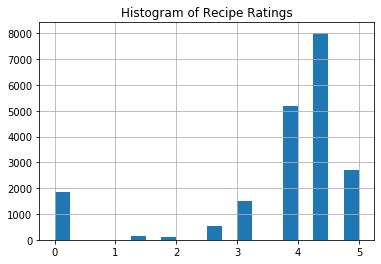

In [76]:
df.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [77]:
# null counts
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(680)


,Total,Percent
fat,4183,0.208608
protein,4162,0.207560
sodium,4119,0.205416
calories,4117,0.205316
turkey,0,0.000000
fourth of july,0,0.000000
fritter,0,0.000000
frittata,0,0.000000
friendsgiving,0,0.000000
freezer food,0,0.000000


##### What we can see right away is that nutrition information is not available for all goods. Now this would be an interesting data point, but let's focus on ingredients and keywords right now. So we'll actually drop the whole columns for calories, protein, fat, and sodium. We'll come back to nutrition information later.

In [125]:
df1 = df.sample(frac=0.3, replace=True, random_state=1)

In [126]:
df1.shape

(6016, 680)

In [127]:
from sklearn.svm import SVR
from time import time
start = time()
svr = SVR()
X = df1.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = df1.rating
svr.fit(X,Y)
print(time()-start)

c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


58.22259736061096


In [78]:
from sklearn.svm import SVR
svr = SVR()
X = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = df.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

##### Note that this actually takes quite a while to run, compared to some of the models we've done before. Be patient. It's because of the number of features we have.

Let's see what a scatter plot looks like, comparing actuals to predicted.


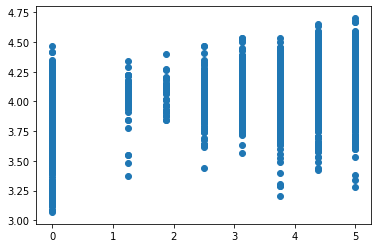

In [128]:
plt.scatter(Y, svr.predict(X))

#### Now that is a pretty useless visualization. This is because of the discontinuous nature of our outcome variable. There's too much data for us to really see what's going on here. If you wanted to look at it you could create histograms, here we'll move on to the scores of both our full fit model and with cross validation. Again if you choose to run it again it will take some time, so you probably shouldn't.

In [80]:
svr.score(X, Y)

-0.003978314483867651

In [81]:
from sklearn.model_selection import cross_val_score
start = time()
cross_val_score(svr, X, Y, cv=5)

print(time()-start)

c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 's

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

Oh dear, so this did seem not to work very well. In fact it is remarkably poor. Now there are many things that we could do here.

Firstly the overfit is a problem, even though it was poor in the first place. We could go back and clean up our feature set. There might be some gains to be made by getting rid of the noise.

We could also see how removing the nulls but including dietary information performs. Though its a slight change to the question we could still possibly get some improvements there.

Lastly, we could take our regression problem and turn it into a classifier. With this number of features and a discontinuous outcome, we might have better luck thinking of this as a classification problem. We could make it simpler still by instead of classifying on each possible value, group reviews to some decided high and low values.

In [121]:
# Clean up data
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
turkey,0,0.0
fortified wine,0,0.0
frittata,0,0.0
friendsgiving,0,0.0
freezer food,0,0.0


In [83]:
# Only 4 features have missing values

In [131]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6016 entries, 235 to 13130
Columns: 680 entries, title to turkey
dtypes: float64(679), object(1)
memory usage: 31.2+ MB


In [103]:
# unique values
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

Unique values in column title are: ['Lentil, Apple, and Turkey Wrap '
 'Boudin Blanc Terrine with Red Onion Confit '
 'Potato and Fennel Soup Hodge ' ... 'Turkey Cream Puff Pie '
 'Snapper on Angel Hair with Citrus Cream '
 'Baked Ham with Marmalade-Horseradish Glaze ']
Unique values in column rating are: [2.5   4.375 3.75  5.    3.125 1.875 0.    1.25 ]
Unique values in column calories are: [ 426.  403.  165. ... 2006. 2417. 1986.]
Unique values in column protein are: [3.00000000e+01 1.80000000e+01 6.00000000e+00 1.00160793e+02
 2.00000000e+01 1.90000000e+01 7.00000000e+00 2.30000000e+01
 4.00000000e+00 1.20000000e+01 1.10000000e+01 5.00000000e+00
 5.90000000e+01 1.00000000e+01 3.00000000e+00 1.00000000e+00
 0.00000000e+00 3.90000000e+01 4.40000000e+01 2.00000000e+00
 1.40000000e+01 8.00000000e+00 8.90000000e+01 3.80000000e+01
 2.10000000e+01 9.00000000e+00 5.40000000e+01 3.60000000e+01
 4.50000000e+01 4.80000000e+01 6.30000000e+01 9.20000000e+01
 2.20000000e+01 1.50000000e+01 1.30000

Unique values in column dairy are: [0. 1.]
Unique values in column dairy free are: [0. 1.]
Unique values in column dallas are: [0. 1.]
Unique values in column date are: [0. 1.]
Unique values in column deep-fry are: [0. 1.]
Unique values in column denver are: [0. 1.]
Unique values in column dessert are: [0. 1.]
Unique values in column digestif are: [0. 1.]
Unique values in column dill are: [0. 1.]
Unique values in column dinner are: [0. 1.]
Unique values in column dip are: [0. 1.]
Unique values in column diwali are: [0. 1.]
Unique values in column dominican republic are: [0. 1.]
Unique values in column dorie greenspan are: [0. 1.]
Unique values in column double boiler are: [0. 1.]
Unique values in column dried fruit are: [0. 1.]
Unique values in column drink are: [0. 1.]
Unique values in column drinks are: [0. 1.]
Unique values in column duck are: [0. 1.]
Unique values in column easter are: [0. 1.]
Unique values in column eau de vie are: [0. 1.]
Unique values in column edible gift are: 

Unique values in column marsala are: [0. 1.]
Unique values in column marscarpone are: [0. 1.]
Unique values in column marshmallow are: [0. 1.]
Unique values in column martini are: [0. 1.]
Unique values in column maryland are: [0. 1.]
Unique values in column massachusetts are: [0. 1.]
Unique values in column mayonnaise are: [0. 1.]
Unique values in column meat are: [0. 1.]
Unique values in column meatball are: [0. 1.]
Unique values in column meatloaf are: [0. 1.]
Unique values in column melon are: [0. 1.]
Unique values in column mexico are: [0. 1.]
Unique values in column mezcal are: [0. 1.]
Unique values in column miami are: [0. 1.]
Unique values in column michigan are: [0. 1.]
Unique values in column microwave are: [0. 1.]
Unique values in column midori are: [0. 1.]
Unique values in column milk/cream are: [0. 1.]
Unique values in column minneapolis are: [0. 1.]
Unique values in column minnesota are: [0. 1.]
Unique values in column mint are: [0. 1.]
Unique values in column mississippi 

Unique values in column side are: [0. 1.]
Unique values in column simmer are: [0. 1.]
Unique values in column skewer are: [0. 1.]
Unique values in column slow cooker are: [0. 1.]
Unique values in column smoker are: [0. 1.]
Unique values in column smoothie are: [0. 1.]
Unique values in column snapper are: [0. 1.]
Unique values in column sorbet are: [0. 1.]
Unique values in column soufflé/meringue are: [0. 1.]
Unique values in column soup/stew are: [0. 1.]
Unique values in column sour cream are: [0. 1.]
Unique values in column sourdough are: [0. 1.]
Unique values in column south carolina are: [0. 1.]
Unique values in column soy are: [0. 1.]
Unique values in column soy free are: [0. 1.]
Unique values in column soy sauce are: [0. 1.]
Unique values in column spain are: [0. 1.]
Unique values in column sparkling wine are: [0. 1.]
Unique values in column spice are: [0. 1.]
Unique values in column spinach are: [0. 1.]
Unique values in column spirit are: [0. 1.]
Unique values in column spring ar

In [132]:
df1.corr()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,1.000000,0.010963,0.015079,0.010909,0.010819,-0.003611,NaN,0.018002,-0.084364,0.011011,...,-0.007881,-0.027985,NaN,0.009745,0.000319,NaN,NaN,-0.021934,0.003447,-0.000011
calories,0.010963,1.000000,0.835889,0.999977,0.999802,-0.000392,NaN,-0.000729,-0.001059,-0.000542,...,-0.000880,-0.003658,NaN,-0.000662,-0.002633,NaN,NaN,-0.000750,-0.000594,-0.003281
protein,0.015079,0.835889,1.000000,0.832239,0.827524,-0.000452,NaN,-0.000688,-0.001203,-0.000502,...,-0.001120,-0.004065,NaN,-0.000819,-0.002994,NaN,NaN,-0.000836,-0.000626,-0.002524
fat,0.010909,0.999977,0.832239,1.000000,0.999866,-0.000436,NaN,-0.000724,-0.001056,-0.000534,...,-0.000882,-0.003669,NaN,-0.000665,-0.002630,NaN,NaN,-0.000756,-0.000600,-0.003296
sodium,0.010819,0.999802,0.827524,0.999866,1.000000,-0.000407,NaN,-0.000709,-0.001058,-0.000541,...,-0.000901,-0.003656,NaN,-0.000665,-0.002638,NaN,NaN,-0.000740,-0.000582,-0.003210
#cakeweek,-0.003611,-0.000392,-0.000452,-0.000436,-0.000407,1.000000,NaN,-0.000576,-0.000815,-0.000407,...,-0.000622,-0.003091,NaN,-0.000470,-0.002090,NaN,NaN,-0.000665,-0.000576,-0.002689
#wasteless,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22-minute meals,0.018002,-0.000729,-0.000688,-0.000724,-0.000709,-0.000576,NaN,1.000000,-0.001413,0.235173,...,-0.001078,-0.005355,NaN,-0.000815,-0.003621,NaN,NaN,-0.001153,-0.000998,-0.004659
3-ingredient recipes,-0.084364,-0.001059,-0.001203,-0.001056,-0.001058,-0.000815,NaN,-0.001413,1.000000,-0.000999,...,-0.001526,0.015035,NaN,-0.001153,-0.005124,NaN,NaN,-0.001631,-0.001413,-0.006592
30 days of groceries,0.011011,-0.000542,-0.000502,-0.000534,-0.000541,-0.000407,NaN,0.235173,-0.000999,1.000000,...,-0.000762,-0.003786,NaN,-0.000576,-0.002560,NaN,NaN,-0.000815,-0.000706,-0.003293


In [86]:
# Above: no issues


In [118]:
df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.000000,30.000000,7.000000,559.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.000000,18.000000,23.000000,1439.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.000000,6.000000,7.000000,165.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,6322.958017,100.160793,346.877497,6225.974895,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.000000,20.000000,32.000000,452.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
df["fat"].fillna(df["fat"].mean(), inplace=True)
#df["sodium"].fillna(df["sodium"].mean(), inplace=True)
#df["protein"].fillna(df["protein"].mean(), inplace=True)
#df["calories"].fillna(df["calories"].mean(), inplace=True)

In [114]:
total_missing = df.isnull().sum().sort_values(ascending=False)
percent_missing = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
turkey,0,0.0
fortified wine,0,0.0
frittata,0,0.0
friendsgiving,0,0.0
freezer food,0,0.0


In [115]:
# redo after clean up
from sklearn.svm import SVR
svr = SVR()
X = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = df.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
svr.score(X, Y)

-0.003978314483867651

In [117]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 's

array([-0.01787926, -0.02916288, -0.02841122, -0.03767394, -0.01735362])

In [ ]:
from sklearn.svm import SVC
svc = SVC()
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, Y, cv=5)

In [ ]:
# take our regression problem and turn it into a classifier.

In [139]:
df.rating.describe()

count    20052.000000
mean         3.341163
std          1.316827
min          0.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

In [144]:
df.rating.dtypes

dtype('int32')

In [146]:
df["rating"] = df['rating'].astype(int)

In [147]:
X = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = df.rating.sample(frac=0.3, replace=True, random_state=1)
svr.fit(X,Y)

c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
from sklearn.svm import SVC
start = time()
svc = SVC()
from sklearn.model_selection import cross_val_score
cross_val_score(svc, X, Y, cv=5)

print(time()-start)
# add timer

c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 's

181.94395804405212


In [150]:
X = df.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1).sample(frac=0.3, replace=True, random_state=1)
Y = df.rating.sample(frac=0.3, replace=True, random_state=1)
svc.fit(X,Y)

c:\python\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [151]:
svc.score(X, Y)

0.4060837765957447

In [ ]:
# the new score is a huge improvement compared to the previous score(-0.003978314483867651)